# Quantum Chemistry with Pennylane

Credits: https://www.youtube.com/watch?v=khC0CCjxB7k

Quantum chemistry (QC) is the study of molecules using quantum theory. With QC, we can model certain materials to understand what happens under certain ciecumstances. 

To begin this, we need to first visualize atoms and molecules. They usually have electrons floating in 'orbitals' around the nucleus of the cell (i.e., occupying energy levels), with a capped number of electrons per orbital.

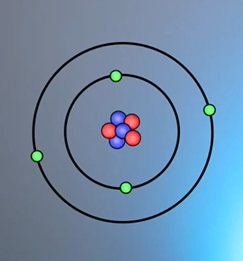

_^ Atomic structure_

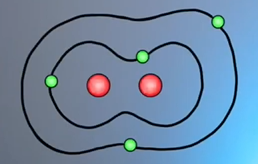

_^ Molecular structure_

It's the energy of these electrons that determine how the molecule will behave electronically. To understand how to represent these electronic states using qubits, we need to touch on a concept called the Jordan Wigner Representation. 

## What's the Jordan Wigner Representation?

Assume we have 3 energy levels around an atom or molecule, with 2 electrons per energy level. (This is related to the Pauli Exclusion Principle, which dictates the caps on electrons per energy level).

3 energy levels (orbitals) x 2 electrons gives us 6 qubits to represent all three potential energy levels. Each energy level pair consists of one spin-up and one spin-down electron (roughly representing the ket-0 and ket-1 states).

As such, 6 potential energy states of 0 and 1 equates to 6 qubits needed. When we write it out, we indicate which pair and slot holds an active electron (and which direction it's spinning in), and zero out the rest.

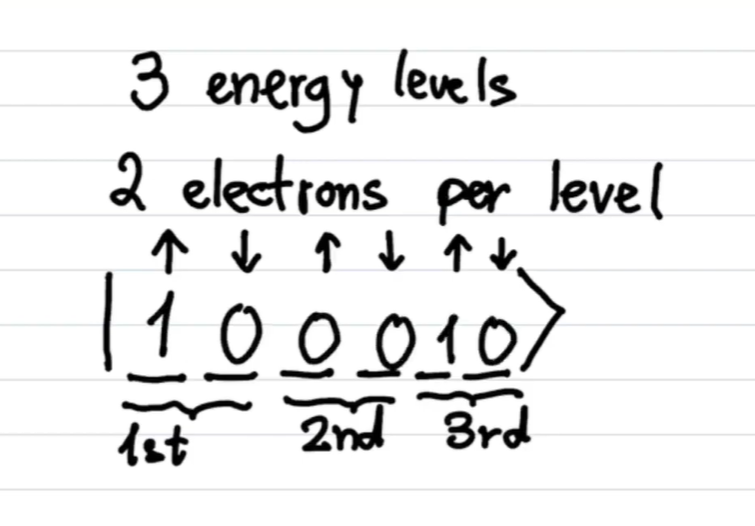

In the above example, |100010> means that the first slot of the first pair has a spin-up electron, while there's no electron in the spin-down position. The first slot of the third pair has one too, also with no spin-down electron in that orbital. The rest are zeros, meaning there are no electrons there.

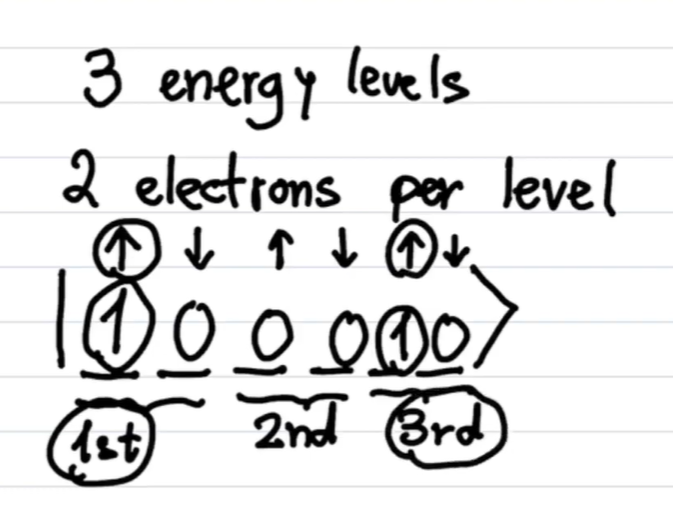

In this second example, we can surmise that the first orbital (or energy level) has no electron; the second has a spin-up electron (first slot) but no spin-down electron; and the third orbital has no spin-up electron, but has a spin-down electron.

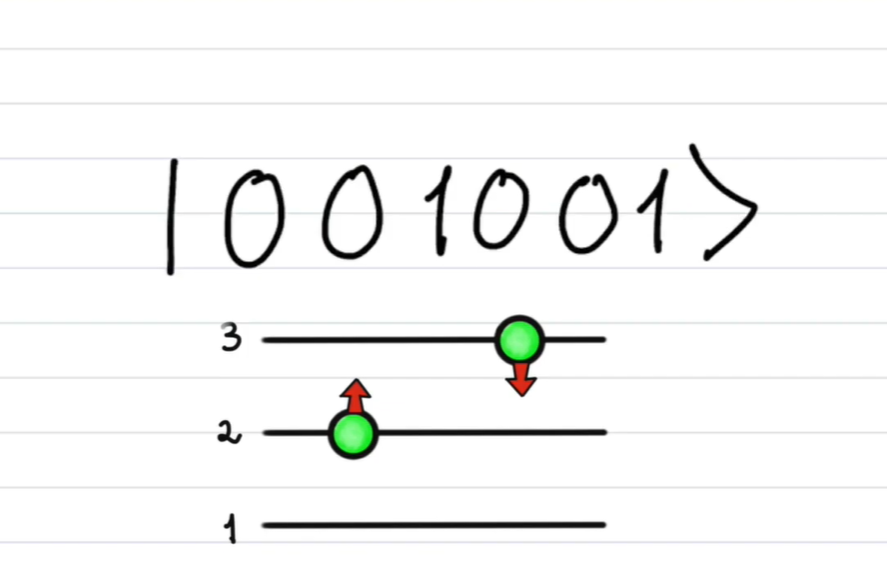



In order to accurately predict the chemical properties of these molecules, we need to know the energy levels occupied by these electrons. We do this by calculating the Hamiltonian, a quantum operator which essentially models all the interactions within the molecule. 

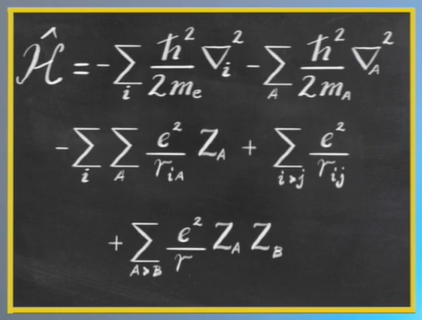

_^ What the Hamiltonian looks like_

There's just one problem: molecules are pretty complex, with lots of interactions that are hard to predict. Electrons are interacting with protons, which are interacting with neutrons, which are...you get the point.

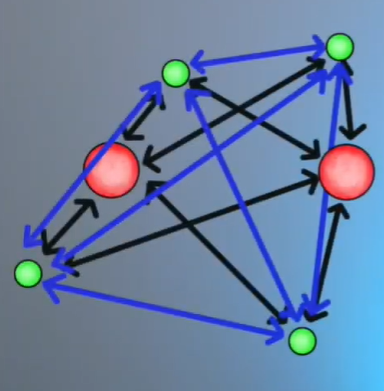

_^ Molecules can get quite busy..._

So we need **approximations**. And the way we do that is through what's called a Hartree-Fock appoximation. Hartree-Fock helps us by calculating the molecular geometry of where the atomic nuclei are, before we can calculate the Hamiltonian. 

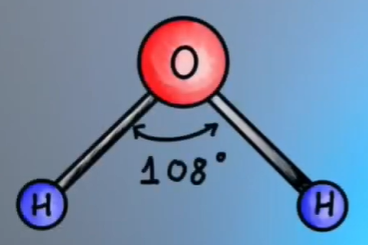

Pennylane can help with both. Let's see how what looks like next.



In [10]:
import pennylane as qml
from pennylane import numpy as np

# Quantum chemistry module
from pennylane import qchem

It helps to get an idea of what molecules we'll be working with. In this notebook, we'll try to model two hydrogen atoms. 

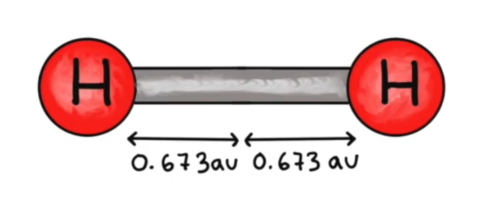

We'll start off by initializing a `symbols` variable with the letters of the molecular formula, H2 (so two Hs in an array).

Hydrogen atoms have a roughly defined atomic distance from each other, which we derive from a [publicly available dataset](https://cccbdb.nist.gov/geom1x.asp). The data tells us this distance between each hydrogen atom in H2 is 0.673 atomic units from the center, so we can put that information in an array of coordinates for x, y, and z axes.

In [11]:
symbols = ["H", "H"]
coordinates = np.array([[-0.673,0,0], [0.673,0,0]])

We've now defined our molecule. Next, we'll define variable for the Hamiltonian (`H`) and our qubits.

In [12]:
H, qubits = qchem.molecular_hamiltonian(symbols, coordinates)
print(f"Hamiltonian has {len(H)} terms and {qubits} qubits.\n")
print("Hamiltonian:")
print(H)

Hamiltonian has 15 terms and 4 qubits.

Hamiltonian:
-0.059722777506507174 * I([0, 1, 2, 3]) + 0.17574790106889876 * Z(0) + 0.17574790106889876 * Z(1) + 0.1700120046062239 * (Z(0) @ Z(1)) + -0.23663556589795115 * Z(2) + 0.12222295790716331 * (Z(0) @ Z(2)) + 0.16714112448986262 * (Z(1) @ Z(2)) + 0.044918166582699315 * (Y(0) @ X(1) @ X(2) @ Y(3)) + -0.044918166582699315 * (Y(0) @ Y(1) @ X(2) @ X(3)) + -0.044918166582699315 * (X(0) @ X(1) @ Y(2) @ Y(3)) + 0.044918166582699315 * (X(0) @ Y(1) @ Y(2) @ X(3)) + -0.23663556589795115 * Z(3) + 0.16714112448986262 * (Z(0) @ Z(3)) + 0.12222295790716331 * (Z(1) @ Z(3)) + 0.1756999882843957 * (Z(2) @ Z(3))


We're now going to build a quantum circuit that calculates the expectation value of the enrgy for an electronic state in the Jordan Vigner Representation (i.e., as a Python array).

In [16]:
num_wires = qubits
dev = qml.device("default.qubit", wires=num_wires)

@mql.qnode(dev)

# Define the variational quantum circuit
def exp_energy(state):

    # Prepare the basis state that will act on all the wires
    qml.BasisState(np.array(state), wires=range(num_wires))

    # Measure the expectation value of the Hamiltonian
    return qml.expval(H)

Let'snow see what this function returns for some states in the Jordan Vigner Representation. We'll test it with a state that has one electron in the first energy level and one in the second energy level (orbital), both with spin-up.

In [17]:
exp_energy([1, 0, 1, 0])

tensor(-0.4952711, requires_grad=True)

This yields a tensor object with a negative value. However, it's still not the lowest energy state that we can observe (i.e., ground state), also known as the Hartree-Fock State. To calculate _that_, we can use QChem.

In [18]:
# Define the Hartree-Fock state
# orbitals here mean spin-orbitals, not regular orbitals
# There's one spin-orbital per electron
hf = qchem.hf_state(electrons=2, orbitals=4)

exp_energy(hf)

tensor(-1.11750588, requires_grad=True)

Printing that yields an energy that's lower than the original state we had.

# What we've learned:

So far, we've learned how to:
1. Represent molecular electronic states using the Jordan Vigner Representation so we can use quantum computing to study quantum chemistry.
2.Use use Pennylane to, given a configuration of a molecule given to us by the Hartree-Fock Approximation, write the Hamiltonian that describes that molecule and predict for example values for the energy.

On the downside, the HF approximation isn't enough to help us accurately predict exactly what happens in a chemical reaction. To predict that more accurately, we need to apply Post-Hartree-Fock methods such as VQE.